# Linear regression with multiple variables (Part 2) - Using Normal Equation

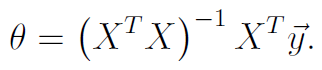

This is a python implementation of the Linear Regression exercise in week 2 of Coursera's online Machine Learning course, taught by Dr. Andrew Ng. We are provided with data for house sizes in square feet and number of bedrooms. The task is to use linear regression to determine how the size and the number of bedrooms affects price of the house. Our ultimate aim is to predict the price of a new house given the size in square feet and the number of bedrooms.

In part 1, we used gradient descent to obtain the coefficient of linear regression, by minimizing the error of prediction. In this task we implement linear regression using normal equation. We obtain values for theta (coefficients),which we then use to predict the price of a 3 bedroom house with an area of 1650 square feet, just like in part1, and we expect to get the same result. When using normal equations,there's no need to apply normalization to the input values because unlike gradient descent, there are no iterations, the coefficients are obtained in one calculation.

In [34]:
#Let's start by importing relevant python libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Let's import the data into a Pandas dataframe called data. There are 3 columns in the dataset, Size, Bedrooms, and Price.

In [35]:
data2 = pd.read_csv('ex1data2.txt', names=['Size', 'Bedrooms', 'Price'])

In [36]:
data2.head() ## View the first 5 records in the dataset.

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [37]:
X = data2.drop(['Price'], axis=1)  ## Assign all but the price field to the independent variable X
y = data2['Price'] ## Assign the field to the dependent variable y 
m=len(y) ## m is the length of the training set

In [38]:
X = np.append(np.ones([m,1]), X, axis=1) ## Append the bias term (field containing all ones) to X

Implemeting the normal equation algorithm
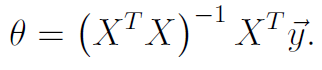

There are different ways to implement the normal equation in python. You may choose to implement it one step at a 
time, or you may do it all at once. I have done the latter.

In [39]:
theta = np.linalg.inv((X.T.dot(X))).dot(X.T.dot(y))

In [40]:
print(theta) ## Here we get theta as a 1x3 matrix

[89597.9095428    139.21067402 -8738.01911233]


In [41]:
theta=theta.reshape(3,1) ## We reshape the matrix before using it for prediction

In [42]:
print(theta) ## We now have a 3 x 1 matrix

[[89597.9095428 ]
 [  139.21067402]
 [-8738.01911233]]


# Prediction

Our task is to predict the price of a house with an area of 1650 square feet with 3 bedrooms. We represent the information we have as follows:

In [43]:
X = [1650, 3]

Note that we don't need to normalize the X, but we still need to add the bias term (1). In the section below, we add the bias term to X.

In [44]:
X_new = np.append(1, X)

In [45]:
print(X_new)

[   1 1650    3]


We now have a vector ([1, 1650,    3]) representing the house, we can pass it into a predictor function to get the price of the house.

Now we need to create the predictor function.

In [46]:
def prediction(X, theta):
    '''
    This function takes in the features of the house 
    as well as the coefficients, and returns the 
    predicted price.
    '''
    return np.dot(X, theta)


Pred = prediction(X_new, theta) ## Call the function and provide the parameters.

print(Pred) ## Print out the prediction.

[293081.46433489]


The value obtained for the prediction, 293081.46433489 is the same as we obtained in part1 after using gradient descent to obtain the best performing learning rate.

We can use the coefficients generated by running the normal equation to predict the price of any house as long as 
we have the size and the number of rooms. 

The normal equation though simple to implement, is not used on large datasets. When the size of the dataset becomes 
too large, the computation becomes too expensive to be practical. In that case we resort to the gradient 
descent algorithm.